# Set Kaggle



In [1]:
# Upload Kagle Token

from google.colab import files
uploaded = files.upload()

Saving kaggle.json to kaggle.json


In [3]:
# Create the Kaggle folder & Move the Kaggle token file into it

import os
import shutil

kaggle_dir = '/root/.kaggle'

if not os.path.exists(kaggle_dir):
  os.makedirs(kaggle_dir)

source = '/content/kaggle.json'
destination = '/root/.kaggle/kaggle.json'

if os.path.exists(source):
  shutil.move(source, destination)


In [4]:
# Change permissions to the Kaggle token file

!chmod 600 ~/.kaggle/kaggle.json

In [5]:
# Download the dataset from Kaggle site

# URL of the page: https://www.kaggle.com/datasets/shariful07/student-mental-health

!kaggle datasets download -d shariful07/student-mental-health

Dataset URL: https://www.kaggle.com/datasets/shariful07/student-mental-health
License(s): CC0-1.0
  0% 0.00/1.62k [00:00<?, ?B/s]
100% 1.62k/1.62k [00:00<00:00, 3.77MB/s]


In [6]:
# Unzip the file in the same Colab directory

!unzip /content/student-mental-health.zip -d /content/

Archive:  /content/student-mental-health.zip
  inflating: /content/Student Mental health.csv  


# Analysis Part I

In [11]:
# Packages import

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
file_path = '/content/Student Mental health.csv'
df = pd.read_csv(file_path)
df.head(10)

,Timestamp,Choose your gender,Age,What is your course?,Your current year of Study,What is your CGPA?,Marital status,Do you have Depression?,Do you have Anxiety?,Do you have Panic attack?,Did you seek any specialist for a treatment?
0,8/7/2020 12:02,Female,18.0,Engineering,year 1,3.00 - 3.49,No,Yes,No,Yes,No
1,8/7/2020 12:04,Male,21.0,Islamic education,year 2,3.00 - 3.49,No,No,Yes,No,No
2,8/7/2020 12:05,Male,19.0,BIT,Year 1,3.00 - 3.49,No,Yes,Yes,Yes,No
3,8/7/2020 12:06,Female,22.0,Laws,year 3,3.00 - 3.49,Yes,Yes,No,No,No
4,8/7/2020 12:13,Male,23.0,Mathemathics,year 4,3.00 - 3.49,No,No,No,No,No
5,8/7/2020 12:31,Male,19.0,Engineering,Year 2,3.50 - 4.00,No,No,No,Yes,No
6,8/7/2020 12:32,Female,23.0,Pendidikan islam,year 2,3.50 - 4.00,Yes,Yes,No,Yes,No
7,8/7/2020 12:33,Female,18.0,BCS,year 1,3.50 - 4.00,No,No,Yes,No,No
8,8/7/2020 12:35,Female,19.0,Human Resources,Year 2,2.50 - 2.99,No,No,No,No,No
9,8/7/2020 12:39,Male,18.0,Irkhs,year 1,3.50 - 4.00,No,No,Yes,Yes,No


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 11 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Timestamp                                     101 non-null    object 
 1   Choose your gender                            101 non-null    object 
 2   Age                                           100 non-null    float64
 3   What is your course?                          101 non-null    object 
 4   Your current year of Study                    101 non-null    object 
 5   What is your CGPA?                            101 non-null    object 
 6   Marital status                                101 non-null    object 
 7   Do you have Depression?                       101 non-null    object 
 8   Do you have Anxiety?                          101 non-null    object 
 9   Do you have Panic attack?                     101 non-null    obj

# Graphs EX_XP

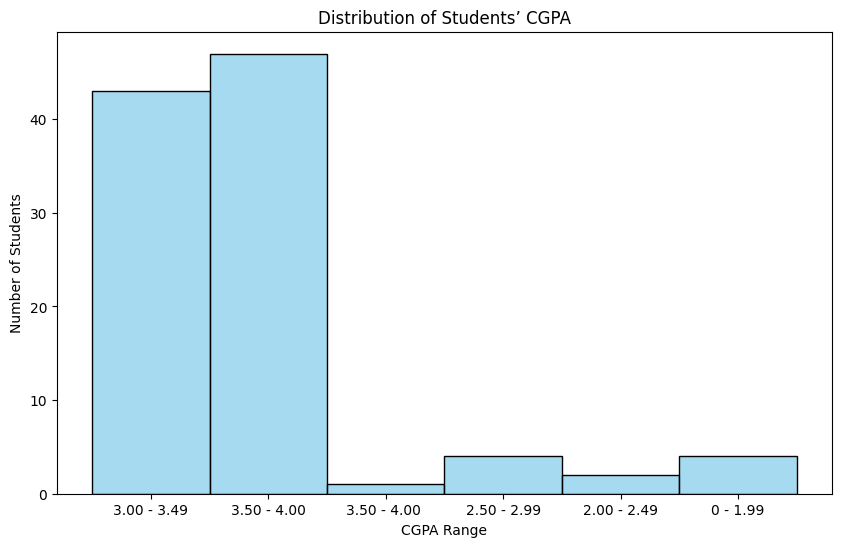

In [15]:
#EX EP I
# Create a histogram using Seaborn's histplot
plt.figure(figsize=(10, 6))
sns.histplot(df['What is your CGPA?'], bins=10, color='skyblue', kde=False)

# Customize the histogram with a title
plt.title('Distribution of Students’ CGPA')
plt.xlabel('CGPA Range')
plt.ylabel('Number of Students')

# Display the plot
plt.show()

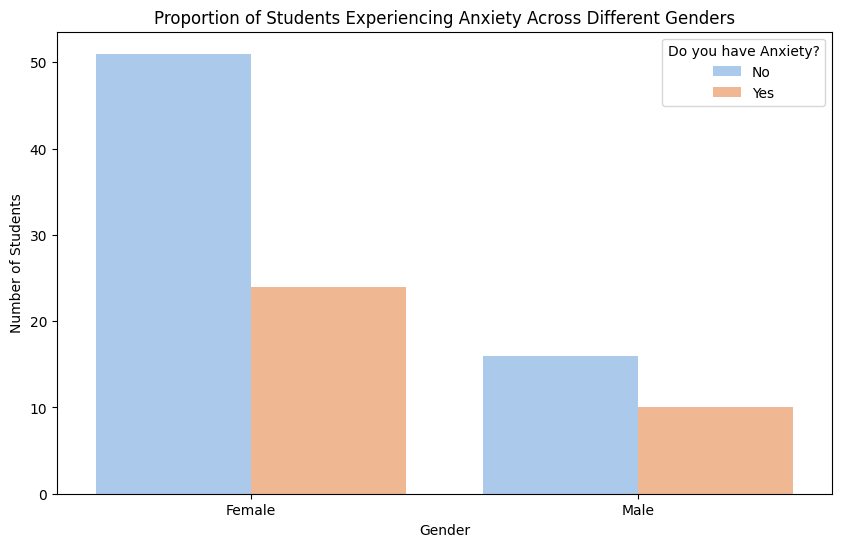

In [14]:
#EX EP II
# Create a bar plot to compare anxiety levels across different genders
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Choose your gender', hue='Do you have Anxiety?', palette='pastel')

# Customize the plot with a title
plt.title('Proportion of Students Experiencing Anxiety Across Different Genders')
plt.xlabel('Gender')
plt.ylabel('Number of Students')

# Display the plot
plt.show()

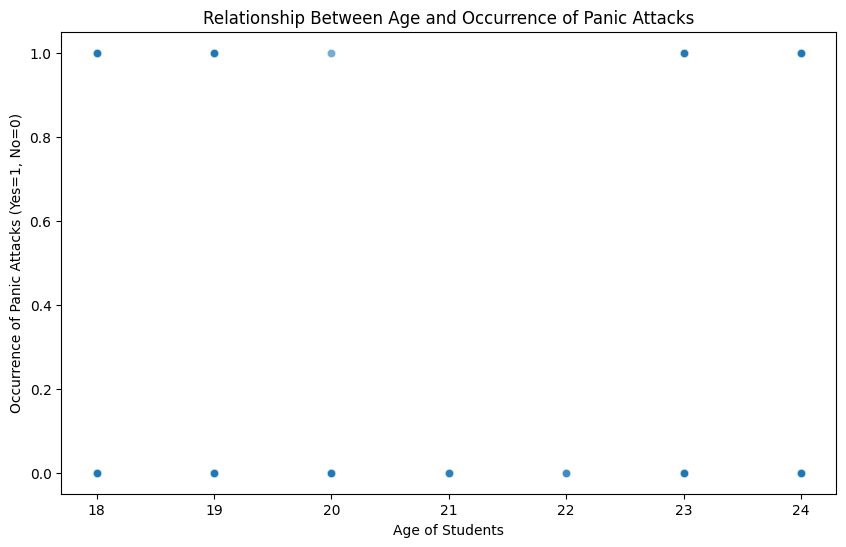

In [17]:
#EX EP III
import seaborn as sns
import matplotlib.pyplot as plt

# Convert 'Do you have Panic attack?' responses to numeric
df['Panic_Attack_Numeric'] = df['Do you have Panic attack?'].map({'Yes': 1, 'No': 0})

# Create a scatter plot with age on the x-axis and panic attacks on the y-axis
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Age', y='Panic_Attack_Numeric', alpha=0.6)

# Customize the plot to improve readability
plt.title('Relationship Between Age and Occurrence of Panic Attacks')
plt.xlabel('Age of Students')
plt.ylabel('Occurrence of Panic Attacks (Yes=1, No=0)')

# Display the plot
plt.show()


<ipython-input-19-9872958ec097>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=age_panic_proportion, x='Age', y='Panic_Attack_Numeric', palette='viridis')


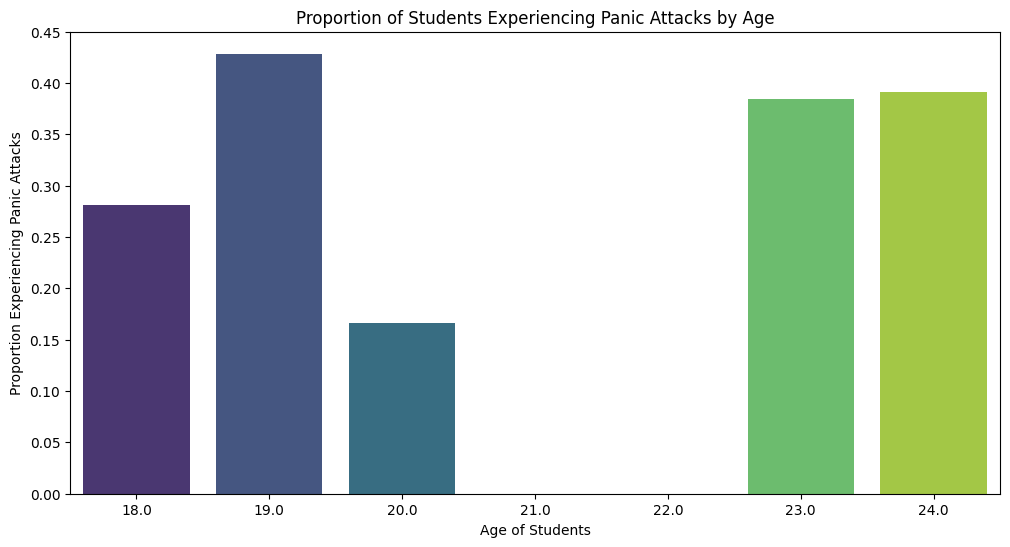

In [19]:
# Convert 'Do you have Panic attack?' responses to numeric for easier analysis
df['Panic_Attack_Numeric'] = df['Do you have Panic attack?'].map({'Yes': 1, 'No': 0})

# Calculate the proportion of students with panic attacks for each age group
age_panic_proportion = df.groupby('Age')['Panic_Attack_Numeric'].mean().reset_index()

# Create a bar plot using Seaborn
plt.figure(figsize=(12, 6))
sns.barplot(data=age_panic_proportion, x='Age', y='Panic_Attack_Numeric', palette='viridis')

# Customize the plot
plt.title('Proportion of Students Experiencing Panic Attacks by Age')
plt.xlabel('Age of Students')
plt.ylabel('Proportion Experiencing Panic Attacks')

# Display the plot
plt.show()

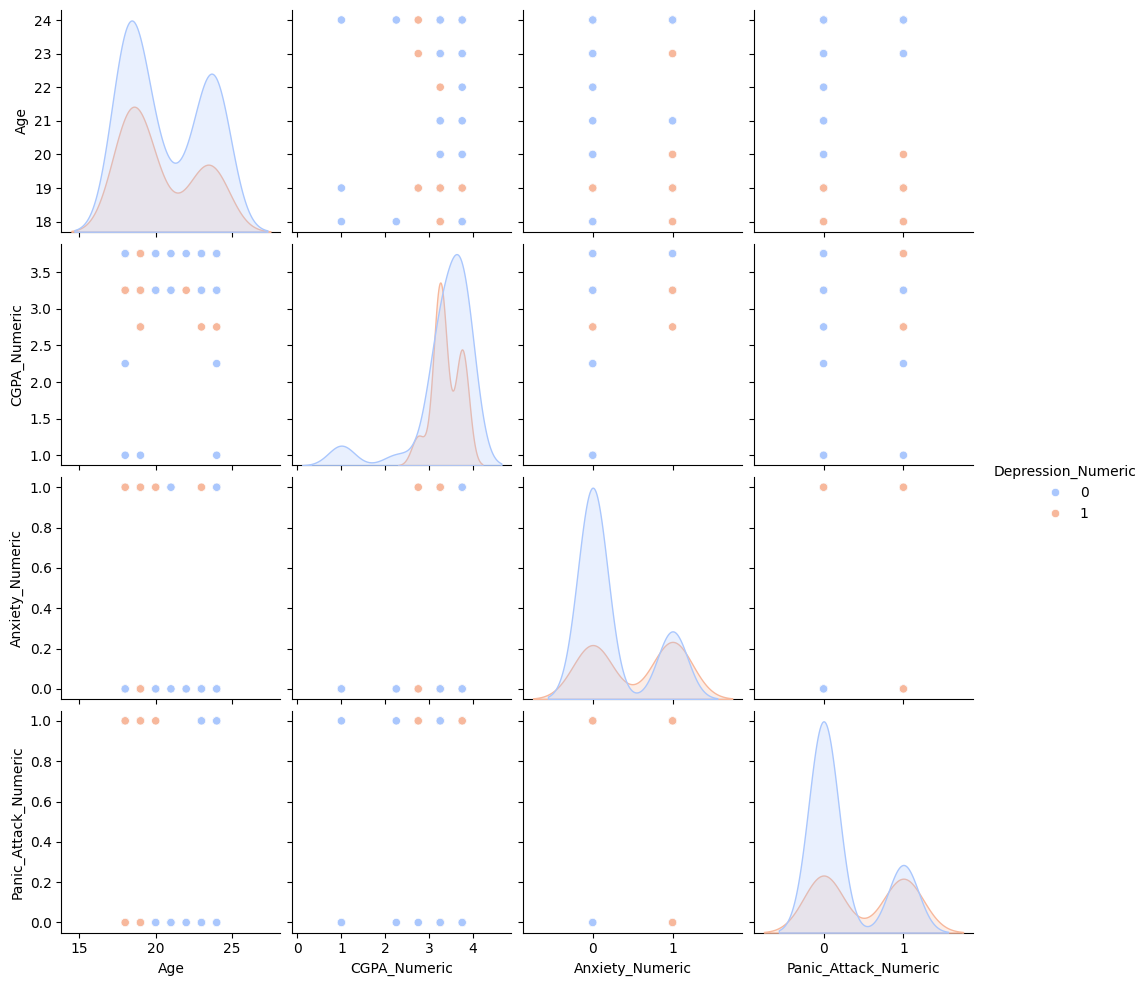

In [20]:
#EX EP IV
# Convert mental health status columns to numeric values for simplicity
df['Depression_Numeric'] = df['Do you have Depression?'].map({'Yes': 1, 'No': 0})
df['Anxiety_Numeric'] = df['Do you have Anxiety?'].map({'Yes': 1, 'No': 0})
df['Panic_Attack_Numeric'] = df['Do you have Panic attack?'].map({'Yes': 1, 'No': 0})

# Convert CGPA categories to numerical ranges for simplicity
cgpa_mapping = {
    '0 - 1.99': 1.0,
    '2.00 - 2.49': 2.25,
    '2.50 - 2.99': 2.75,
    '3.00 - 3.49': 3.25,
    '3.50 - 4.00': 3.75
}
df['CGPA_Numeric'] = df['What is your CGPA?'].map(cgpa_mapping)

# Select relevant columns for the pair plot
subset = df[['Age', 'CGPA_Numeric', 'Depression_Numeric', 'Anxiety_Numeric', 'Panic_Attack_Numeric']]

# Create a pair plot using Seaborn with hue based on 'Depression_Numeric'
sns.pairplot(subset, hue='Depression_Numeric', palette='coolwarm')

# Display the plot
plt.show()


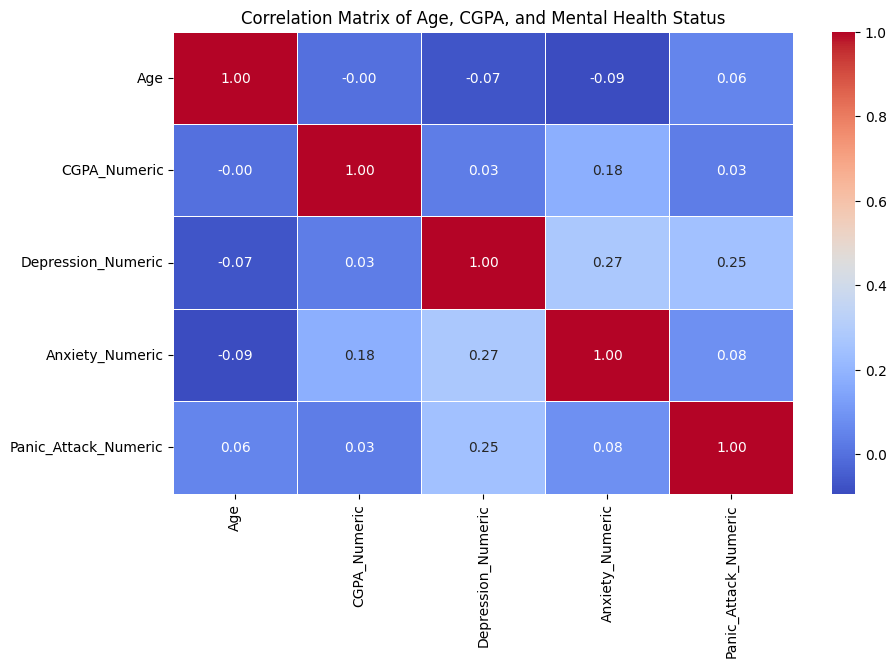

In [21]:
#EX EP V
# Select relevant columns for calculating the correlation matrix
subset = df[['Age', 'CGPA_Numeric', 'Depression_Numeric', 'Anxiety_Numeric', 'Panic_Attack_Numeric']]

# Calculate the correlation matrix
correlation_matrix = subset.corr()

# Create a heatmap using Seaborn to visualize the correlation matrix
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)

# Customize the heatmap with a title
plt.title('Correlation Matrix of Age, CGPA, and Mental Health Status')

# Display the plot
plt.show()

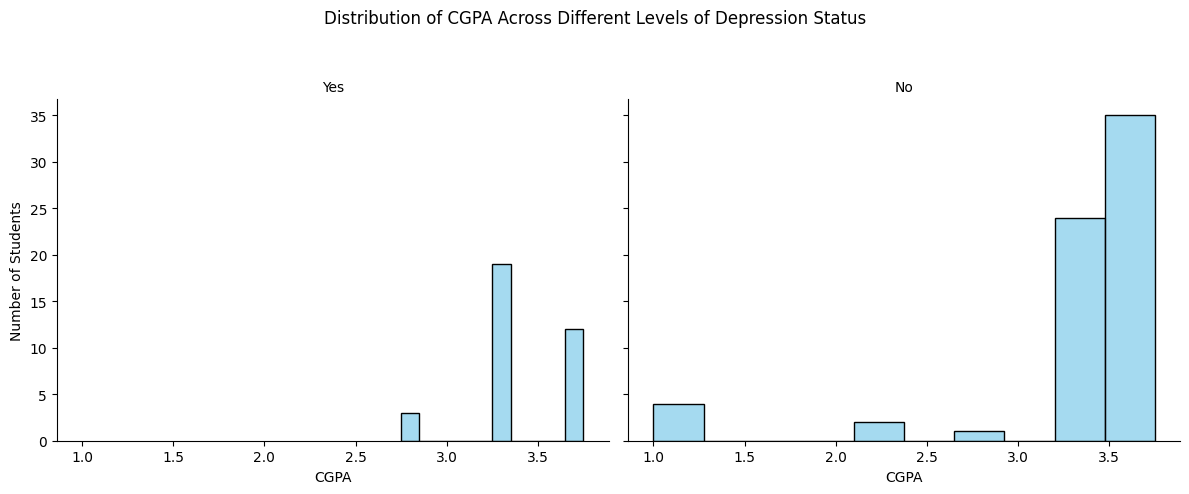

In [23]:
#EX EP VI
# Convert CGPA categories to numerical ranges for simplicity if not already done
cgpa_mapping = {
    '0 - 1.99': 1.0,
    '2.00 - 2.49': 2.25,
    '2.50 - 2.99': 2.75,
    '3.00 - 3.49': 3.25,
    '3.50 - 4.00': 3.75
}
df['CGPA_Numeric'] = df['What is your CGPA?'].map(cgpa_mapping)

# Set up the FacetGrid with depression status as the column facet
g = sns.FacetGrid(df, col='Do you have Depression?', height=5, aspect=1.2, palette='Set2')

# Map a histogram plot to each facet for CGPA
g.map(sns.histplot, 'CGPA_Numeric', kde=False, bins=10, color='skyblue')

# Add titles and labels for clarity
g.set_axis_labels('CGPA', 'Number of Students')
g.set_titles(col_template='{col_name}')

# Adjust the layout and add a main title
plt.subplots_adjust(top=0.8)
g.fig.suptitle('Distribution of CGPA Across Different Levels of Depression Status')

# Display the plot
plt.show()

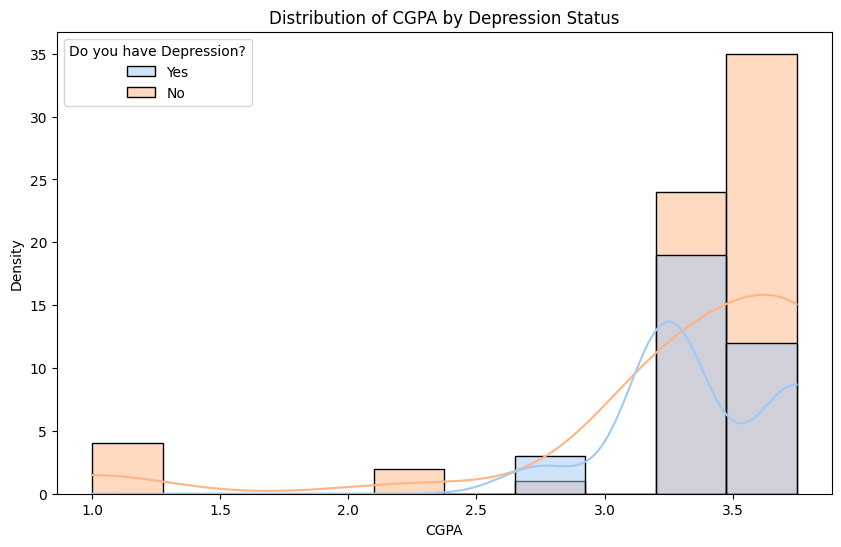

In [27]:
# Convert CGPA categories to numerical ranges for simplicity if not already done
cgpa_mapping = {
    '0 - 1.99': 1.0,
    '2.00 - 2.49': 2.25,
    '2.50 - 2.99': 2.75,
    '3.00 - 3.49': 3.25,
    '3.50 - 4.00': 3.75
}
df['CGPA_Numeric'] = df['What is your CGPA?'].map(cgpa_mapping)

# Create a histogram plot with hue for depression status, setting multiple='layer' for overlapping effect
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='CGPA_Numeric', hue='Do you have Depression?', multiple='layer',
             bins=10, palette='pastel', kde=True, alpha=0.5)

# Customize the plot with titles and labels
plt.title('Distribution of CGPA by Depression Status')
plt.xlabel('CGPA')
plt.ylabel('Density')

# Display the plot
plt.show()